<h1 align="center">Redes Neuronales Convolucionales con TensorFlow</h1> 

<img src="Imagenes/tf.png",width=200,height=200, align="center">

*Realizado por Ana Arias, Miguel Arnaiz y Alejandro Gómez* 

## Redes neuronales: perceptrón, sigmoidal, softmax

Como el nombre indica, la red neuronal comenzó con la idea de imitar el funcionamiento de las redes neuronales de los organismos vivos: un conjunto de neuronas conectadas entre sí y que trabajan en conjunto, sin que haya una tarea concreta para cada una. Con la experiencia, las neuronas van creando y reforzando ciertas conexiones para "aprender" algo que se queda fijo en el tejido. Las redes neuronales son un modelo para encontrar esa combinación de parámetros y aplicarla al mismo tiempo. En el lenguaje propio, encontrar la combinación que mejor se ajusta es "entrenar" la red neuronal. Una red ya entrenada se puede usar luego para hacer predicciones o clasificaciones.

Las redes neuronales han ido moviéndose para tener un foco en matemáticas y estadística. Se basan en una idea sencilla: dados unos parámetros hay una forma de combinarlos para predecir un cierto resultado. Por ejemplo, sabiendo los píxeles de una imagen habrá una forma de saber qué número hay escrito.

Para empezar, explicaremos el tipo de red neuronal artificial más sencilla: el perceptrón, con el objetivo de poder entender otro tipo de redes neuronales más complejas empleadas en el trabajo. Un perceptrón es un elemento que tiene varias entradas con un cierto peso cada una. Si la suma de esas entradas por cada peso es mayor que un determinado número, la salida del perceptrón es un uno. Si es menor, la salida es un cero.
Un perceptrón toma varias entradas binarias, x1, x2,..., xn y produce una única salida binaria:

<img src="Imagenes/percep1.png",width=200,height=200,align="center">

Se introducen pesos, w1, w2,..., wn que son números reales que expresan la importancia de las entradas respectivas a la salida. Al igual que los pesos, el threshold o umbral es un número real que representa un parámetro de la neurona. Para ponerlo en términos algebraicos más precisos:

<img src="Imagenes/percep2.png",width=300,height=300,align="center">

El problema del uso del perceptrón es que el sesgo de un solo perceptrón en la red a veces puede hacer que la salida cambie por completo el resultado. 

Se puede superar este problema mediante la introducción de neuronas artificiales como son las sigmoideas y las softmax. Estas redes neuronales son de tipo feedforward en la que la información fluye en una única dirección, desde la capa de entrada a la de salida a través de las capas ocultas. No hay caminos cíclicos entre las conexiones. 

Las neuronas sigmoideas son similares a los perceptrones, pero se modifican para que pequeños cambios en sus pesos y sesgos causen solo un pequeño cambio en su producción. Ese es el hecho crucial que permitirá que una red de neuronas sigmoideas aprenda.

Al igual que un perceptrón, la neurona sigmoidea tiene entradas, x1, x2,… Pero en lugar de ser solo 0 u 1, estas entradas también pueden tomar valores entre 0 y 1. También al igual que un perceptrón, la neurona sigmoidea tiene pesos para cada entrada, w1, w2,... y un sesgo general, b. Pero la salida no es 0 u 1. En cambio, es σ (wx + b), donde σ se llama función sigmoidea.

<img src="Imagenes/sig1.png",width=350,height=350,align="center">

La suavidad de σ significa que pequeños cambios Δwj en los pesos y Δb en el sesgo producirán un pequeño cambio Δoutput en la salida de la neurona. De hecho, el cálculo nos dice que Δoutput se aproxima bien a:

<img src="Imagenes/sig2.png",width=300,height=300,align="center">

Para cada salida se calcula la diferencia entre la respuesta correcta y la obtenida y se reajustan hacia atrás de manera que se minimice el error buscando el mínimo mediante el método del descenso del gradiente incremental (o estocástico). Se trata ahora de encontrar las mejores aproximaciones a los valores de W y b, a partir de los datos de entrada. Para ello se modifican los valores W y b en cada iteración para acercarnos a la respuesta. Para saber si vamos mejorando en estas iteraciones utilizamos una función de coste o función de error que mide cómo se ajusta la recta generada a los datos de que disponemos.

Esto puede ser útil, por ejemplo, si queremos usar el valor de salida para representar la intensidad promedio de los píxeles en una entrada de imagen a una red neuronal. Supongamos que queremos que la salida de la red indique "la imagen de entrada es un 9" o "la imagen de entrada no es un 9". Obviamente, sería más fácil hacer esto si la salida fuera 0 o 1, como en un perceptrón. Pero en la práctica podemos establecer una convención para tratar esto, por ejemplo, al decidir interpretar cualquier salida de al menos 0.5 como indicando un "9", y cualquier salida menor que 0.5 como indicando "no un 9".

Por último las redes neuronales con función de activación softmax funcionan de manera similar a las redes neuronales sigmoideas pero sirven para clasificar problemas multiclase donde se obtienen probabilidades para las diferentes clases. La función de salida que se aplica es:

<img src="Imagenes/soft1.png",width=250,height=250,align="center">

## Introducción al problema

Nuestro cerebro ha sido sintonizado por la evolución a lo largo de cientos de millones de años, y adaptado para comprender el mundo visual. Reconocer dígitos escritos a mano no es fácil. Más bien, nosotros los humanos somos increíblemente buenos para dar sentido a lo que nuestros ojos nos muestran. Pero casi todo ese trabajo se hace inconscientemente. Por lo tanto, generalmente no apreciamos lo difícil que es resolver nuestros sistemas visuales.


Las intuiciones simples sobre cómo reconocemos las formas - "un 9 tiene un bucle en la parte superior y un trazo vertical en la parte inferior derecha" - resultan no ser tan simples de expresar algorítmicamente. Cuando tratas de hacer que tales reglas sean precisas, te pierdes rápidamente en un cúmulo de excepciones y casos especiales. 

Las redes neuronales abordan el problema de una manera diferente. La idea es tomar una gran cantidad de dígitos escritos a mano, conocidos como ejemplos de entrenamiento y luego desarrollar un sistema que pueda aprender de esos ejemplos de entrenamiento.

<img src="Imagenes/numerosMNIST.png",width=350,height=350,align="center">

La red neuronal usa los ejemplos para inferir automáticamente reglas para reconocer dígitos escritos a mano. Además, al aumentar el número de ejemplos de capacitación, la red puede aprender más sobre la escritura a mano, y así mejorar su precisión. Cuanto mayor sea la cantidad de ejemplos con los que entrenar la red neuronal, mejor aprenderá.

A continuación, vamos a programar una red neuronal de aprendizaje profundo para solventar el problema de reconocimiento de dígitos mediante imágenes con la librería TensorFlow de Google. 

## Introducción teórica e intuitiva al funcionamiento de las RNC

En el siguiente esquema se muestra el proceso de reconocimiento de una imagen que nunca ha sido vista por la red neuronal. Este esquema servirá de ayuda para explicar el funcionamiento de una RNC. Es necesario decir de antemano que los procesos que se realizan a continuación son de una complejidad elevada, y se intentará explicarlo de la forma más clara posible.

<img src="Imagenes/ResumenRNC.png",width=800,height=800,align="center">

Como puede observarse, la red neuronal recibe la imagen de un número 7. En este paso, las neuronas de entrada son el número de pixels en la imagen. Como se ha comentado anteriormente, la imagen ha sido tratada para centrarla en un espacio de 28x28, por tanto, en el inicio se encuentran 784 neuronas que reciben un input en forma de pixel (cada neurona es un pixel, y el pixel es un número que se identifica con la intensidad de la trazada en la imagen). A continuación, se encuentra la primera capa oculta de neuronas o *hidden layer*. Esta capa está formada por 16 neuronas que albergan 25 pixels en formato de 5x5 (estos hiperparámetros son decisión del diseñador de la RNC). Cada neurona se conoce bajo la denominación de filtro, pesos o kernel, y representa una característica concreta de las imágenes. Cada filtro, recorrerá la imagen en función de un parámetro conocido como *window stride*. Este parámetro son los pasos que avanza el filtro una vez examinada una región 5x5 de la imagen original. En cada paso, la neurona recoge información sobre la similitud entre el patrón que busca y la imagen original, obteniendo una nueva imagen tras haber terminado el proceso de examinación.

Por ejemplo, el primer filtro (*Convolutional Layer 1*, neurona 5x5, situada en la zona de la esquina superior izquierda del recuadro) ha recorrido toda la imagen del 7, paso a paso (en función del *window stride*) recopilando información acerca de si la característica que se estudia está representada en la imagen. Tras haber finalizado, se da un proceso de activación y reducción -que será explicado más adelante-, resultando una nueva imagen de menor tamaño y procesada por una neurona (a la derecha del recuadro del *Convolutional Layer 1*, la imagen de 14x14 situada en en la esquina superior izquierda con forma de siete). Como puede observarse se tienen 16 filtros, y el output son 16 imágenes nuevas de 14x14, por ello, cada filtro, kernel o neurona, ha realizado este mismo proceso de reconocimiento devolviendo una nueva imagen. 

A continuación, esas imágenes (outputs de la primera capa oculta) se convierten en el input de una nueva capa oculta -que se encuentra en una zona superior a la primera-. Por lo tanto, se introdujo una nueva imagen a las neuronas de entrada, se crearon un grupo 16 neuronas que eran filtros o kernels, y su output fueron 16 nuevas imágenes. El proceso en la segunda capa oculta es más complejo. Dado que existen 16 imágenes, debe haber 16 grupos de neuronas que estudien las características de las imágenes. A continuación, se especifica el tamaño de cada grupo: 36 neuronas (como en la capa anterior, a voluntad del diseñador de la red neuronal). Por lo tanto, en esta capa se encuentran 576 neuronas artificiales que funcionan de filtros de tamaño 5x5. A la hora de estudiar la primera imagen, la primera neurona (filtro de 5x5) del grupo 1 situada en la esquina superior izquierda, estudia el primer conjunto de 5x5 píxeles superior izquierda de la imagen de 14X14 situada en la esquina superior izquierda del conjutno de imágenes que fueron el output de la primera capa, y esta neurona almacena la información recibida. La primera neurona del segundo grupo realiza este mismo proceso para la neurona contigua a la anterior estudiada (a la derecha de la primera imagen 14x14), la primera neurona del tercer grupo realiza lo mismo, y del cuarto grupo, y del quinto... 

Este proceso continúa hasta que "todas las primeras neuronas de cada grupo" estudian todos los primeros 5x5 píxeles situados en las esquina superiores izquierdas de cada imagen de 14x14. Tras este proceso, se ha calculado tan solo el primer pixel de la primera imágen de 7x7 que se encuentra (en el esquema) a la derecha de la segunda capa oculta. Para calcular el segundo pixel, este conjunto de neuronas 5x5 primeras de cada grupo estudiará el segundo conjunto de 5x5 de la misma imagen (es decir, da un salto o *window stride* hacia la derecha en la primera imágen de 14x14, dado que el primer conjunto 5x5 ya ha sido estudiado por todas las primeras neuronas). Tras haberse aplicado este proceso, se habrá calculado el segundo pixel de la imagen 7x7 situada a la izquierda de la segunda capa oculta. Esto termina cuando todas las neuronas han recorrido todas las imágenes, y el output son 36 nuevas imágenes. (Véase como de la primera primera imagen con 16 filtros, se obtenían 16 nuevas imágenes; en este caso, se tienen 16 grupos apilados de 36 en 36 neuronas, y por ello, se obtiene como output 36 nuevas imágenes).

Por último, tras haber obtenido 36 nuevas imágenes que muestran características o rasgos concretos de la imagen que se está analizando, estas se transmiten a lo que se conoce como *Fully-Connected Layer*. Las imágenes generadas en las capas ocultas ofrecen un espacio de características significativo pero sin mucha variabilidad. Si estas son aplanadas y convertidas a vectores, esta nueva capa puede aprender relaciones no-lineales entre las características estudiadas. Finalmente, mendiante funciones de clasificación que se verán más adelante, se le asignan probabilidades a los distintos números, y aquel que mayor probabilidad reciba, es la solución final. En el caso del esquema, puede observarse como que se un 7 recibe un 80% de probabilidad, y por tanto, la decisión acertada por la red neuronal es que la imagen representa un número 7. En este contexto, cabe destacar que aunque la inteligencia humana pueda asegurar sin prácticamente ningún esfuerzo cognitivo que ese número es un 7, la red neuronal nunca podrá afirmar este hecho con total seguridad, dado que la base de su actuación es reconocer características y patrones específicos de cada imagen. 

Como puede apreciarse, los procesos internos que realiza la red neuronal para reconocer una nueva imagen son muy complejos, resultando un verdadero reto realizar una explicación concisa de su funcionamiento.

## Convolution, Rectifier Linear Unit y Pooling

Para comprender el funcionamiento de una Red Neuronal Convolucional (RNC) es necesario entender tres procesos que ocurren en las capas ocultas de la RNC. Estos procesos son de vital importancia en la fase de reconocimiento, y se conocen como "Convolution", "Rectifier Linear Unit" y "Pooling" (en castellano podría traducirse como convolución, activación y reducción).

### Convolution

Básicamente, la convolución es una operación matemática de productos, sumas y divisiones entre la imagen de entrada y un ﬁltro o kernel, que genera un mapa de características. Como se ha explicado anteriormente, cada neurona o filtro extrae la característica que estudia en cada parte de la imagen, reduciendo el número de conexiones que se tendrían frente a un estudio pixel a pixel. Por ello, si la imagen de entrada es de 28x28 y los filtros de 5x5 -como en el ejemplo que se está realizando-, el mapa estaría recogiendo (28-5 + 1)×(28-5 +1) = 576 características, es decir, un mapa de dimension 24x24.

Esta imagen puede ser de ayuda para entender el proceso:

<img src="Imagenes/convolution.png",width=400,height=400, align="center">

### Rectifier Linear Unit

El Rectifier Linear Unit -también conocido por sus siglas ReLu- es una función de activación para los mapas producidos durante el proceso de convolución. Para simplificar la explicación, esta función consiste básicamente en transformar los números negativos resultado de la convolución en valores nulos (es decir, en ceros). Esto facilita el aprendizaje de la red neuronal ya que se tratan únicamente números positivos y la insentisad varía únicamente de forma ascendente. Esta función plantea algunos promblemas, dado que se pierde información sobre la característica que es estudia, y puede llevar a la extención de alguna neurona durante la optimización cuando la tasa de aprendizaje es alta y el descenso del gradiente intenta modificar los pesos, de forma que la neurona puede no activarse para ninguna de las imágenes de entrenamiento (en la convolución siempre se anotan número negativos sobre el mapa). No se quiere entrar en detalle en este aspecto, pero resulta de mucho interés. 

En conclusión, es una función transformadora de activación que simplifica el análisis y facilita el aprendizaje. Un ejemplo gráfico e intuitivo sería el siguiente:

<img src="Imagenes/relus.png",width=600,height=600, align="center">

### Pooling

Tras obtener los mapas de características se podrían mandar los resultados a la siguiente capa oculta, sin embargo, estos son demasiado grandes para su procesamiento y además podría llevar al overfitting dado que contienen mucha información. Para ello, existe un técnica de reducción de la imagen que, además, es un complemento perfecto para evitar que la red neuronal memorice los rasgos característicos de cada imagen con la que se entrena. Esta técnica se denomina Pooling. Básicamente consiste en realizar operaciones matemáticas simples sobre un conjunto de pixels del mapa de factores. Se podría tratar utilizando la media, mediana o máximo según prefiera el diseñador de la red neuronal. El formato de uso más común se conoce como MaxPooling, mediante el cual, de un conjunto de pixels se escoge aquel de mayor intensidad para el pixel de la nueva imagen. En el caso que nos ocupa, el mapa de características resultante de la primera capa tenía unas dimensiones de 24x24, y tras el Pooling, se transforma a un 14x14. 

Gráficamente con un ejemplo sencillo la explicación resulta más intuitiva: 

<img src="Imagenes/maxPooling.png",width=600,height=600, align="center">

Como apunte final antes de comenzar con el diseño de la RNC, véase como estos tres procesos son la piedra angular del funcionamiento de la Red Neuronal Convolucional. En el caso concreto que se va a desarrollar, estos procesos se reptetirán dos veces, una vez por cada capa oculta hasta llegar a la *Fully-Connected Layer*.

## Importación de librerías

**Nota técnica**: *En el caso de que se quiera reproducir los resultados, la red neuronal ha sido diseñada utilizando un contenedor en Docker que garantize el aislamiento de las funciones de TensorFlow y no entre en conflicto con sistemas como Anaconda. El código está escrito en Python 3 y la versión de TensorFlow es 1.4.1. Al final de este documento se adjunta la documentación oficial para el proceso de instalación*

In [105]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta
import math

In [106]:
tf.__version__

'1.4.1'

## Configuración de la red neuronal

Los hiperparámetros de la Red Neuronal Convolucional se definen aquí. De este modo, es sencillo cambiarlos y volver a correr todo el código para experimentar.

In [107]:
# Capa convolucional 1.
filter_size1 = 5          # Cada filtro de esta primera capa es de  5 x 5 pixels.
num_filters1 = 16         # Hay un total de 16 filtros.

# Capa convolucional 2.
filter_size2 = 5          # Cada filtro de esta primera capa es de  5 x 5 pixels.
num_filters2 = 36         # Hay un total de 36 filtros.

# Fully-Connected Layer.
fc_size = 128             # Número de neuronas en la Fully-Connected Layer.

## Carga de datos

El dataset de MNIST pesa 12 MB y se descarga automáticamente con el siguiente comando.

In [108]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('data/MNIST/', one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


El conjunto de datos MNIST ya está cargado y consta de 70,000 imágenes y sus repectivas etiquetas (es decir, clasificaciones de las imágenes). El conjunto de datos se divide en 3 subconjuntos mutuamente excluyentes. 

**Nota:** *En este ejercicio, dada su longitud, no se va a utilizar la muestra de validación*

In [109]:
print("Size of:")
print("- Training-set:\t\t{}".format(len(data.train.labels)))
print("- Test-set:\t\t{}".format(len(data.test.labels)))
print("- Validation-set:\t{}".format(len(data.validation.labels)))

Size of:
- Training-set:		55000
- Test-set:		10000
- Validation-set:	5000


Las etiquetas de clase están codificadas por el método One-Hot, lo que significa que cada etiqueta es un vector con 10 elementos, todos los cuales son cero excepto uno. El índice de este elemento es el número de clase, es decir, el dígito que se muestra en la imagen asociada. También se necesitan los números de clase como enteros para el conjunto de test, por lo que se calcula a continuación.

In [110]:
data.test.cls = np.argmax(data.test.labels, axis=1)

### Dimensiones de los datos

Las dimensiones de datos van a utilizarse repetidamente a lo largo de todo el código. Se definen una vez para que podamos usar estas variables en lugar de números en todo el código fuente.

In [111]:
# Sabemos que las imágenes de MNIST son de 28 x 28 pixels.
img_size = 28

# Las imágenes están almacenadas en un array de esta dimensión.
img_size_flat = img_size * img_size

# La tupla de la altura y el ancho de las imágenes se usa para remodelar los arrays.
img_shape = (img_size, img_size)

# Número de canales de color para las imágenes: la escala de grises es un canal.
num_channels = 1

# Número de clases, una para cado uno de los 10 dígitos.
num_classes = 10

### Función para representar las imágenes


Se define la siguiente función que traza 9 imágenes en una cuadrícula de 3x3, y escribe debajo de cada imagen tanto la predicción como el dígito que realmente es.

In [112]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Crea una figura con 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot imagen.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Muestra la predicción y la real.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Muestra las clasese en el eje X.
        ax.set_xlabel(xlabel)
        
        # Elimina los ticks del gráfico.
        ax.set_xticks([])
        ax.set_yticks([])
    
    
    plt.show()

### Ejemplos de imágenes de la muestra de test

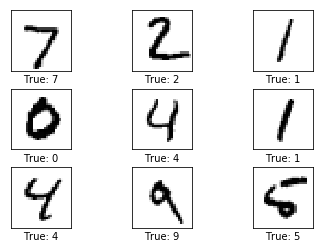

In [113]:
# Cogemos las primeras imágenes del test-set.
images = data.test.images[0:9]

# Sacamos la clase de cada imagen.
cls_true = data.test.cls[0:9]

# Representamos la imagen y las etiquetas con la función definida arriba.
plot_images(images=images, cls_true=cls_true)

### Función para crear nuevas variables


Se definen las siguietes funciones para crear nuevas variables de TensorFlow en la forma dada e inicializarlas con valores aleatorios. Hay que tener en cuenta que la inicialización no se realiza en este punto, simplemente se está definiendo en el grafo de ejecución de TensorFlow. Inicialmente, la RNC posee unos filtros, pesos o kernels que son aleatorios, y con el proceso de entrenamiento y optimización -como se verá más adelante- una versión mejorada del Descenso del Gradiente minimizará la función de costes basada en los errores, modificando por tanto estos valores.

In [114]:
def new_weights(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.05)) # Filtros o pesos

In [115]:
def new_biases(length):
    return tf.Variable(tf.constant(0.05, shape=[length])) 
# Esto es el sesgo de las neuronas, es decir, un parámetro que aporta ruido y aleatoriedad para evitar el overfitting.

### Función para crear una nueva capa convolucional

La siguiente función crea una nueva capa convolucional para la red. Recuerdese que todavía no se está calculando nada, sólo se están añadiendo las fórmulas matemáticas al grafo de Tensorflow que se ejecutará más tarde.

Se asume que que el input es un tensor de 4 dimensiones:

  **1.** Número de la imagen.
  
  **2.** Eje Y de cada imagen.
  
  **3.** Eje X de cada imagen.
  
  **4.** Canales de cada imagen.

Hay que tener en cuenta que los canales de entrada pueden ser canales de color o pueden ser canales de filtro si la entrada se produce a partir de una capa convolucional previa.

El output es otro tensor de 4 dimensiones compuesto por:

 **1.** Número de la imagen.
 
 **2.** Eje Y de cada imagen. Si se usa la agrupación 2x2, entonces la altura y el ancho de las imágenes de entrada se divide por 2.
 
 **3.** Eje X de cada imagen. Ocurre lo mismo que en el eje Y.
 
 **4.** Canales producidos por los filtros convolucionales.



In [116]:
def new_conv_layer(input,              # La capa previa.
                   num_input_channels, # Num. canales de la capa previa.
                   filter_size,        # Tamaño de cada filtro.
                   num_filters,        # Número de filtros
                   use_pooling=True):  # Uso 2x2 max-pooling.

    # Damos forma a los pesos en los filtros.
    shape = [filter_size, filter_size, num_input_channels, num_filters]

    # Creamos nuevos pesos con la forma que acabamos de crear.
    weights = new_weights(shape=shape)

    # Creamos nuevos sesgos, uno para cada filtro.
    biases = new_biases(length=num_filters)

    # Vemos que los pasos se establecen en 1 en todas las dimensiones.
    # El primer y último paso siempre debe ser 1,
    # porque el primero es para el número de imagen y
    # el último es para el canal de entrada.
    # Los dos unos del medio significan que los filtros se mueven 
    # un pixel en el eje X y un pixel en el eje Y.
    # El parámtro padding = SAME significa que la imagen que entra 
    # se rellena de ceros. De esta forma la figura de la salida será idéntica.
    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    # Añadimos el resultado del sesgo de cada filtro.
    layer += biases

    # Use pooling sirve para bajar la resolución de la imagen
    if use_pooling:
        # Se trata de 2x2 max-pooling. Esto significa que
        # va cogiendo ventanas de 2x2 pixels, y toma el valor
        # más alto de cada una, para luego moverse a la siguiente ventana.
        layer = tf.nn.max_pool(value=layer,
                               ksize=[1, 2, 2, 1],
                               strides=[1, 2, 2, 1],
                               padding='SAME')

    # Utilizamos la ReLU para calcular el max (x,0) para cada input.
    # Esto añade cierta no linealidad a la fórmula y permite aprender
    # formas más complejas.
    layer = tf.nn.relu(layer)


    # Sacamos como resultado tanto la capa resultatne como sus pesos 
    # ya que graficaremos estos más adelante.
    return layer, weights

### Función para crear una nueva capa aplanada

Una capa convolucional produce un tensor de salida con 4 dimensiones. Se añadirán capas completamente conectadas a la capa final (*Fully-Connected Layer*) después de las capas de convolución, por lo que se debe reducir el tensor de 4 dimensiones a 2 dimensiones para que se puede utilizar como entrada para la *Fully-Connected Layer*. Esto es lo que conseguimos en esta capa.

In [117]:
def flatten_layer(layer):
    # Cogemos la estructura de la capa de inputs.
    layer_shape = layer.get_shape()

    # Esta estrucutura se presupone que es:
    # layer_shape == [num_images, img_height, img_width, num_channels]

    # Número de componentes: img_height * img_width * num_channels
    # Podemos hacer este cálculo con una función propia de TensorFlow.
    num_features = layer_shape[1:4].num_elements()
    
    # Reestructuramos la capa en: [num_images, num_features].
    # Tenga en cuenta que simplemente establecemos el tamaño
    # de la segunda dimensión en num_features y el tamaño de la primera dimensión en -1.
    
    layer_flat = tf.reshape(layer, [-1, num_features])

    # La forma de la capa aplanada es :
    # [num_images, img_height * img_width * num_channels]

    # Devuelve la capa "aplanada" y el número de características.
    return layer_flat, num_features

### Función para crear una capa totalmente conectada

Esta función crea una nueva *Fully-Connected Layer* en el grafo computacional para TensorFlow. Se supone que la entrada es un tensor de 2 dim de forma `[num_images, num_inputs]`. La salida es un tensor de 2 dim de forma `[num_images, num_outputs]`.

In [118]:
def new_fc_layer(input,          # La capa anterior.
                 num_inputs,     # Num. inputs de la capa anterior.
                 num_outputs,    # Num. outputs.
                 use_relu=True): # Utiliza la ReLU.

    # Crea nuevos pesos y sesgos.
    weights = new_weights(shape=[num_inputs, num_outputs])
    biases = new_biases(length=num_outputs)

    # Calcule la capa como la multiplicación de la matriz de la entrada y los pesos.
    # Luego agregue los valores de sesgo.
    layer = tf.matmul(input, weights) + biases

    # Uso ReLU.
    if use_relu:
        layer = tf.nn.relu(layer)

    return layer

### Placeholder variables


Las *placeholder varaibles* sirven como entrada al grafo computacional de TensorFlow, que se pueden cambiar cada vez que se ejecuta el grafo de TensorFlow. Llamamos a esto alimentar las *placeholder variables*.

Primero se define la *placeholder variable* para las imágenes de entrada. Esto permite cambiar las imágenes que se ingresan a TensorFlow. Este es un tensor, lo que significa que es un vector o matriz multidimensional. El tipo de datos se establece en float32 y la forma se establece en [None, img_size_flat], donde None significa que el tensor puede contener un número arbitrario de imágenes, siendo cada imagen un vector de longitud img_size_flat.

In [119]:
x = tf.placeholder(tf.float32, shape=[None, img_size_flat], name='x')

Las capas convolucionales esperan que x se codifique como un tensor de 4 dimensiones, por lo que se debe remodelar para que su forma sea [num_images, img_height, img_width, num_channels]. Debe tenerse en cuenta que img_height == img_width == img_size y num_images se pueden inferir automáticamente utilizando -1 para el tamaño de la primera dimensión. Entonces la operación de remodelación es:

In [120]:
x_image = tf.reshape(x, [-1, img_size, img_size, num_channels])

A continuación se crea la *placeholder variable* para las etiquetas verdaderas asociadas con las imágenes que se ingresaron en el input de posición x. La forma de esta *placeholder variable* es `[Ninguno, num_clases]` lo que significa que puede contener un número arbitrario de etiquetas y cada etiqueta es un vector de longitud *num_clases*, que es 10 en este caso.

In [25]:
y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')

También se podría tener una *placeholder variable* para el número de clase del que se trata el input, pero en cambio la calcularemos usando argmax. Hay que tener en cuenta que esto es un operador TensorFlow, por lo que no se calcula nada en este punto.

In [26]:
y_true_cls = tf.argmax(y_true, axis=1)

### Capa convolucional 1

Se crea la primera capa convolucional. Toma *x_image* como entrada y crea *num_filters1* filtros diferentes, cada uno con ancho y alto igual a filter_size1. Finalmente, se desea reducir la muestra de la imagen para que tenga la mitad del tamaño utilizando el máximo de 2x2 (proceso de Pooling).

In [121]:
layer_conv1, weights_conv1 = \
    new_conv_layer(input=x_image,
                   num_input_channels=num_channels,
                   filter_size=filter_size1,
                   num_filters=num_filters1,
                   use_pooling=True)

Se verifica la forma del tensor que saldrá por la capa convolucional. Es (?, 14, 14, 16) lo que significa que hay un número arbitrario de imágenes (esto es lo que dignifica el ?). Cada imagen tiene 14 píxeles de ancho y 14 píxeles de alto, y hay 16 canales diferentes, uno por cada filtro.

In [122]:
layer_conv1

<tf.Tensor 'Relu_3:0' shape=(?, 14, 14, 16) dtype=float32>

### Capa convolucional 2

Se crea la segunda capa convolucional, que toma como entrada la salida de la primera capa. La cantidad de canales de entrada corresponde a la cantidad de filtros en la primera capa convolucional.

In [123]:
layer_conv2, weights_conv2 = \
    new_conv_layer(input=layer_conv1,
                   num_input_channels=num_filters1,
                   filter_size=filter_size2,
                   num_filters=num_filters2,
                   use_pooling=True)

Se verifica la forma del tensor que saldrá de esta capa convolucional. La forma es (?, 7, 7, 36) donde el ? nuevamente significa que hay un número arbitrario de imágenes, cada imagen tiene un ancho y una altura de 7 píxeles, y hay 36 canales.

In [124]:
layer_conv2

<tf.Tensor 'Relu_4:0' shape=(?, 7, 7, 36) dtype=float32>

### Capa aplanada

Las capas convolucionales generan tensores de 4 dimensiones. Ahora se quiere utilizar estos como entrada en una capa aplanda, que requiere que los tensores sean reformados a tensores de 2 dimensiones.

In [125]:
layer_flat, num_features = flatten_layer(layer_conv2)

Se verifica que los tensores ahora tengan forma (?, 1764) lo que significa que hay un número arbitrario de imágenes que se han redimensionado a vectores de longitud de 1764 cada uno. Hay que tener en cuenta que 1764 = 7 x 7 x 36.

In [126]:
layer_flat

<tf.Tensor 'Reshape_6:0' shape=(?, 1764) dtype=float32>

In [127]:
num_features

1764

### *Fully-Connected Layer* 1

Se agrega una *Fully-Connected Layer* a la red. La entrada es la capa aplanada de la convolución previa. La cantidad de neuronas en la capa totalmente conectada es `fc_size`. Se utiliza la función ReLU para que pueda aprender relaciones no lineales.

In [128]:
layer_fc1 = new_fc_layer(input=layer_flat,
                         num_inputs=num_features,
                         num_outputs=fc_size,
                         use_relu=True)

Se comprueba que la salida de la capa totalmente conectada sea un tensor con forma (?, 128) donde el? significa que hay una cantidad arbitraria de imágenes y `fc_size == 128`.

In [129]:
layer_fc1

<tf.Tensor 'Relu_5:0' shape=(?, 128) dtype=float32>

### *Fully-Connected Layer* 2

Se agrega otra *Fully-Connected Layer* que genere vectores de longitud 10 para determinar a cuál de las 10 clases pertenece la imagen de entrada. Nótese como en este caso no se utiliza la función ReLU.

In [130]:
layer_fc2 = new_fc_layer(input=layer_fc1,
                         num_inputs=fc_size,
                         num_outputs=num_classes,
                         use_relu=False)

In [131]:
layer_fc2

<tf.Tensor 'add_7:0' shape=(?, 10) dtype=float32>

### Predicciones


La segunda *Fully-Connected Layer* calcula la probabilidad de que la imagen de entrada pertenezca a cada una de las 10 clases. Sin embargo, estas estimaciones son un poco difíciles de interpretar porque las cifras pueden ser muy pequeñas o grandes, por lo que se quiere normalizar para que cada elemento esté limitado entre cero y uno, así como la suma de todas las probabilidades sea uno. Esto se calcula usando la llamada función softmax y el resultado se almacena en `y_pred`.

In [132]:
y_pred = tf.nn.softmax(layer_fc2)

El número de clase es el índice del elemento más grande.

In [133]:
y_pred_cls = tf.argmax(y_pred, axis=1)

### Función de coste a optimizar


Para que el modelo aprenda a clasificar mejor las imágenes de entrada, de alguna manera se deben cambiar los filtros para todas las capas de red. Para hacer ello, es necesario saber cómo predice actualmente el modelo comparando la salida pronosticada del modelo `y_pred` con la salida deseada `y_true`.

La "entropía cruzada" es una medida de rendimiento utilizada en la clasificación. La "entropía cruzada" es una función continua que siempre es positiva y si la salida pronosticada del modelo coincide exactamente con la salida deseada, la "entropía cruzada" es igual a cero. Por tanto, el objetivo de la optimización es minimizar la "entropía cruzada" para que se acerque lo más posible a cero cambiando los filtros de las capas de red.

TensorFlow tiene una función incorporada para calcular la "entropía cruzada". Hay que tener en cuenta que la función calcula el softmax internamente, por lo que se debe usar la salida de `layer_fc2` directamente en lugar de `y_pred` que ya ha aplicado el softmax.

In [134]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=layer_fc2,
                                                        labels=y_true)

Ahora se ha calculado la "entropía cruzada" para cada una de las clasificaciones de imagen, por lo que se tiene una medida de cómo de bien funciona el modelo en cada imagen individualmente. Pero para utilizar la "entropía cruzada" para guiar la optimización de las variables del modelo, se necesita un único valor escalar, por lo que simplemente se calcula el promedio de la "entropía cruzada" para todas las clasificaciones de imagen.

In [135]:
cost = tf.reduce_mean(cross_entropy)

### Método de optimización


Ahora que se tiene una medida de coste que debe minimizarse, es necesario un optimizador. En este caso, es AdamOptimizer, una forma avanzada de Gradient Descent.

Hay que tener en cuenta que la optimización no se realiza en este punto. De hecho, nada se calcula en absoluto, simplemente se agrega el optimizador al grafo de TensorFlow para su posterior ejecución

In [136]:
optimizer = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(cost)

### Medida de rendimiento

Es necesario añadir algunas medidas de rendimiento para mostrar el progreso al usuario.

Este es un vector de booleanos si la clase predicha es igual a la clase verdadera de cada imagen.

In [137]:
correct_prediction = tf.equal(y_pred_cls, y_true_cls)

Esto calcula la precisión de clasificación, convirtiendo el vector de booleanos a números, de modo que False se convierte en 0 y True se convierte en 1, y luego calcula el promedio de estos números.

In [138]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

## Entrenamiento de la Red Neuronal Convolucional


### Inicialización de TensorFlow

Una vez se ha creado el grafo, se debe crear una sesión TensorFlow que ejecute el grafo. (En definitiva acciona los nodos que contienen las funciones y operaciones matemáticas expuestas con anterioridad)

In [151]:
session = tf.Session()

### Inicialización de las variables

Las variables de ponderaciones y sesgos se deben inicializar antes de comenzar a optimizarlas.

In [152]:
session.run(tf.global_variables_initializer())

### Función para la optimización mediante iteraciones


Hay 55,000 imágenes en el conjunto de entrenamiento. Lleva mucho tiempo calcular el gradiente del modelo usando todas estas imágenes. Por lo tanto, solo se va a utilizar un pequeño conjunto de imágenes en cada iteración del optimizador. Es un sistema de eficiencia que recomienda el equipo de TensorFlow. 

Si el ordenador se cuelga o se vuelve muy lento porque se queda sin memoria RAM, quizá habría que reducir este número, pero puede que se necesite realizar más iteraciones de optimización.

In [153]:
train_batch_size = 64

In [154]:
# Hacemos un contador de iteraciones.
total_iterations = 0

def optimize(num_iterations):
    global total_iterations

    # Marcamos el tiempo para imprimir cuanto tarda.
    start_time = time.time()

    for i in range(total_iterations,
                   total_iterations + num_iterations):

        # Cogemos un grupo de ejemplos de training.
        # x_batch contiene un grupo de imágenes mientras que 
        # y_true_batch son el número real de cada imagen.
        x_batch, y_true_batch = data.train.next_batch(train_batch_size)

        # Convertimos la muestra en un diccionario con las clases
        # para las variables placeholder.
        feed_dict_train = {x: x_batch,
                           y_true: y_true_batch}

        # Corremos el optimizador con esta muestra.
        # TensorFlow asigna las variables del diccionario
        # a las variables placeholder y luego ejecuta el optimizador.
        session.run(optimizer, feed_dict=feed_dict_train)

        # Se mira el estado cada 10 iteraciones.
        if i % 10 == 0:
            # Se calcula la precisión de la muestra de training.
            acc = session.run(accuracy, feed_dict=feed_dict_train)

            # Mensaje de salida.
            msg = "Iteración Número: {0:>6}, Training Accuracy: {1:>6.1%}"
            print(msg.format(i + 1, acc))

    # Actualizamos el número total de iteraciones.
    total_iterations += num_iterations

    # Se para el tiempo.
    end_time = time.time()

    # Se hace la diferencia entre el tiempo de inicio y el final.
    time_dif = end_time - start_time

    # Imprimimos el tiempo empleado.
    print("Tiempo utilizado: " + str(timedelta(seconds=int(round(time_dif)))))

### Función para mostrar los errores


Se va a definir una función que saque ejemplos de imágenes del conjunto de test que han sido clasificadas incorrectamente.

In [155]:
def plot_example_errors(cls_pred, correct):

    # cls_pred es un array con las predicciones para 
    # las imágenes de la meustra de test.

    # correct es un array de booleanos que muestra si la predicción
    # coincide con la realidad para las imágenes del test.

    # Sacamos las imagenes mal clasificadas.
    incorrect = (correct == False)
    
    # Toma las imagenes de la muestra de test
    # que han sido clasificadas incorrectamente.
    images = data.test.images[incorrect]
    
    # Saca la predicción de cada imagen.
    cls_pred = cls_pred[incorrect]

    # Saca la solución real de cada imagen.
    cls_true = data.test.cls[incorrect]
    
    # Muestra las 9 primera imágenes.
    plot_images(images=images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9])

### Función para obtener la matriz de confusión

In [156]:
def plot_confusion_matrix(cls_pred):

    # Sacamos las clasificaciones correctas del test.
    cls_true = data.test.cls
    
    # Usamos sklearn para componer la matriz de confusión.
    cm = confusion_matrix(y_true=cls_true,
                          y_pred=cls_pred)

    # Sacamos la matri de confusión como texto.
    print(cm)

    # Sacamos la matri de confusión como imagen.
    plt.matshow(cm)

    # Hacemos algunos ajustes.
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')

    
    plt.show()

### Función para mostrar el rendimiento   

Se va a definir una función para imprimir la precisión de clasificación en el conjunto de test.

Lleva un tiempo calcular la clasificación de todas las imágenes en el conjunto de test, por eso los resultados se reutilizan llamando a las funciones anteriores directamente desde esta función. De esta forma, las clasificaciones no tienen que ser recalculadas por cada función.

In [157]:
# Se divide la muestra de test en conjuntos del tamaño deseado.
test_batch_size = 256

def print_test_accuracy(show_example_errors=False,
                        show_confusion_matrix=False):

    # Número de imágenes en la muestra de test.
    num_test = len(data.test.images)

    # Asigna un array para las clases predichas que
    # se calculará en lotes y se guardará en el objeto cls_pred.
    cls_pred = np.zeros(shape=num_test, dtype=np.int)

    # Vamos a hacer la predicció para los grupos.
    # Para ello vamos a llevar a cabo iteraciones sobre
    # todos ellos.


    # El índice de inicio para el siguiente grupo se denota como i.
    i = 0

    while i < num_test:
        # El índice de fin para el siguiente grupo se
        # denota como j.
        j = min(i + test_batch_size, num_test)

        # Sacamos las imágenes de la mesutra de test entre 
        # los índices i y j.
        images = data.test.images[i:j, :]

        # Sacamos las etiquetas asociadas.
        labels = data.test.labels[i:j, :]

        # Cremos un diccionario con las imágenes y las etiquetas.
        feed_dict = {x: images,
                     y_true: labels}

        # Calculamos la clase a predecir con TensorFlow.
        cls_pred[i:j] = session.run(y_pred_cls, feed_dict=feed_dict)

        # Fijamos el índice de inicio del siguiente grupo en el 
        # índice de fin del grupo anterior.
        i = j

    # Variable de conveniencia para las clases reales de
    # la muestra de test.
    cls_true = data.test.cls

    # Creamos un vector de booleanos que va aumentando
    # uno cada imagen que queda bien clasificada
    correct = (cls_true == cls_pred)

    # Calculamos el número de imágenes bien clasificadas.
    # Los sumamos en un vector de booleanos: 1 es True y 0 es False.
    correct_sum = correct.sum()

    # La precisión de la clasificación se obtiene como 
    # la suma de los aciertos entre la suma de casos totales.
    acc = float(correct_sum) / num_test

    # Imprime la precisión.
    msg = "Accuracy en la muestra de test: {0:.1%} ({1} / {2})"
    print(msg.format(acc, correct_sum, num_test))

    # Se muestran algunos ejemplos de malas clasificaciones si se desea.
    if show_example_errors:
        print("Ejemplos de clasificaciones erroneas:")
        plot_example_errors(cls_pred=cls_pred, correct=correct)

    # Se muestra la matriz de confusión si se desea.
    if show_confusion_matrix:
        print("Matriz de confusión:")
        plot_confusion_matrix(cls_pred=cls_pred)

### *Accuracy* antes de optimizar 

El *accuracy* en el conjunto de test es muy bajo porque las variables del modelo solo se han inicializado y no se han optimizado en absoluto, por lo que solo lleva a cabo una clasificación aleatoria (recuérdese que los pesos eran completamente aleatorios en la inicialización). Se puede suponer que alcanzará una precisión de alrededor del 10%, ya que son 10 cifras a clasificar 1/10*100

In [158]:
print_test_accuracy()

Accuracy en la muestra de test: 10.7% (1071 / 10000)


### *Accuracy* tras 1 iteración 

El *accuracy* de la clasificación en la muestra de test no mejora mucho con solo una iteración. Esto es debido a que la tasa de aprendizaje para el optimizador es muy baja.

In [159]:
optimize(num_iterations=1)

Iteración Número:      1, Training Accuracy:  14.1%
Tiempo utilizado: 0:00:00


In [160]:
print_test_accuracy()

Accuracy en la muestra de test: 12.6% (1256 / 10000)


### *Accuracy* tras 100 iteraciones

Después de 100 iteraciones, el modelo ha mejorado significativamente su precisión a la hora de clasificar las imágenes.

In [161]:
optimize(num_iterations=99) # Se pone 99 iteraciones ya que previamente ya hemos realizado 1.

Iteración Número:     11, Training Accuracy:  21.9%
Iteración Número:     21, Training Accuracy:  20.3%
Iteración Número:     31, Training Accuracy:  32.8%
Iteración Número:     41, Training Accuracy:  50.0%
Iteración Número:     51, Training Accuracy:  28.1%
Iteración Número:     61, Training Accuracy:  57.8%
Iteración Número:     71, Training Accuracy:  51.6%
Iteración Número:     81, Training Accuracy:  57.8%
Iteración Número:     91, Training Accuracy:  67.2%
Tiempo utilizado: 0:00:09


Accuracy en la muestra de test: 58.3% (5831 / 10000)
Ejemplos de clasificaciones erroneas:


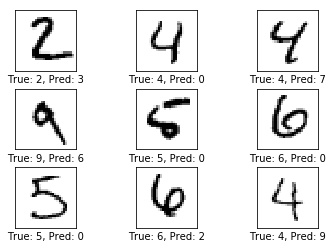

In [162]:
print_test_accuracy(show_example_errors=True)

Está cometiendo errores bastante graves, a simple vista se pueden reconocer todos los números. Quizas el más confuso es el 5 situado en el centro. Pero aún asi no parecen ejemplos complicados de clasificar. 

### *Accuracy* tras 1000 iteraciones

Después de 1000 iteraciones, el modelo ha aumentado enormemente su precisión en el conjunto de prueba a más del 90%

In [163]:
optimize(num_iterations=900) 

Iteración Número:    101, Training Accuracy:  60.9%
Iteración Número:    111, Training Accuracy:  51.6%
Iteración Número:    121, Training Accuracy:  75.0%
Iteración Número:    131, Training Accuracy:  71.9%
Iteración Número:    141, Training Accuracy:  65.6%
Iteración Número:    151, Training Accuracy:  75.0%
Iteración Número:    161, Training Accuracy:  76.6%
Iteración Número:    171, Training Accuracy:  78.1%
Iteración Número:    181, Training Accuracy:  73.4%
Iteración Número:    191, Training Accuracy:  81.2%
Iteración Número:    201, Training Accuracy:  82.8%
Iteración Número:    211, Training Accuracy:  85.9%
Iteración Número:    221, Training Accuracy:  79.7%
Iteración Número:    231, Training Accuracy:  84.4%
Iteración Número:    241, Training Accuracy:  78.1%
Iteración Número:    251, Training Accuracy:  75.0%
Iteración Número:    261, Training Accuracy:  82.8%
Iteración Número:    271, Training Accuracy:  84.4%
Iteración Número:    281, Training Accuracy:  82.8%
Iteración Nú

Accuracy en la muestra de test: 93.1% (9312 / 10000)
Ejemplos de clasificaciones erroneas:


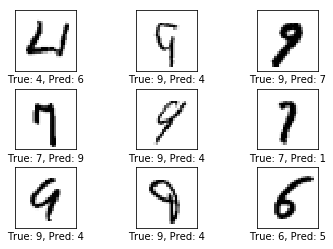

In [164]:
print_test_accuracy(show_example_errors=True)

Afortunadamente, tras haber conseguido un 93.1% de acierto, los errores no son tan graves. Por ejemplo, el primer dígito situado en la esquina superior izquierda, no parece un cuatro. Lo ha predicho como un 6, pero no nos interesa que aprenda que esa trazada es un cuatro dado que estaría distorsionando la realidad y sus futuras predicciones. Por otro lado, el número siete situado en la posición [2,3] -si se trata como una matriz-, podría ser perfectamente un uno. Es más, bajo nuestro criterio consideramos que la clasificación correcta es un uno, así que en ese aspecto la red neuronal se está comportando adecuadamente. El resto de números serían clasificados por un humano con facilidad, pero es comprensible que la red puede tener dudas.

### *Accuracy* tras 10.000 iteraciones

Después de 10.000 iteraciones, el modelo tiene una precisión de clasificación en el conjunto de test de aproximadamente el 99%.

In [165]:
optimize(num_iterations=9000)

Iteración Número:   1001, Training Accuracy:  90.6%
Iteración Número:   1011, Training Accuracy:  85.9%
Iteración Número:   1021, Training Accuracy:  90.6%
Iteración Número:   1031, Training Accuracy:  95.3%
Iteración Número:   1041, Training Accuracy:  93.8%
Iteración Número:   1051, Training Accuracy:  93.8%
Iteración Número:   1061, Training Accuracy:  93.8%
Iteración Número:   1071, Training Accuracy:  84.4%
Iteración Número:   1081, Training Accuracy:  92.2%
Iteración Número:   1091, Training Accuracy:  89.1%
Iteración Número:   1101, Training Accuracy:  92.2%
Iteración Número:   1111, Training Accuracy:  90.6%
Iteración Número:   1121, Training Accuracy:  93.8%
Iteración Número:   1131, Training Accuracy:  96.9%
Iteración Número:   1141, Training Accuracy:  95.3%
Iteración Número:   1151, Training Accuracy:  89.1%
Iteración Número:   1161, Training Accuracy:  89.1%
Iteración Número:   1171, Training Accuracy:  85.9%
Iteración Número:   1181, Training Accuracy:  93.8%
Iteración Nú

Iteración Número:   2581, Training Accuracy:  95.3%
Iteración Número:   2591, Training Accuracy:  95.3%
Iteración Número:   2601, Training Accuracy:  98.4%
Iteración Número:   2611, Training Accuracy:  98.4%
Iteración Número:   2621, Training Accuracy:  96.9%
Iteración Número:   2631, Training Accuracy:  98.4%
Iteración Número:   2641, Training Accuracy:  98.4%
Iteración Número:   2651, Training Accuracy:  95.3%
Iteración Número:   2661, Training Accuracy:  93.8%
Iteración Número:   2671, Training Accuracy: 100.0%
Iteración Número:   2681, Training Accuracy:  95.3%
Iteración Número:   2691, Training Accuracy:  92.2%
Iteración Número:   2701, Training Accuracy:  96.9%
Iteración Número:   2711, Training Accuracy:  95.3%
Iteración Número:   2721, Training Accuracy:  96.9%
Iteración Número:   2731, Training Accuracy:  98.4%
Iteración Número:   2741, Training Accuracy:  96.9%
Iteración Número:   2751, Training Accuracy:  98.4%
Iteración Número:   2761, Training Accuracy:  95.3%
Iteración Nú

Iteración Número:   4161, Training Accuracy:  98.4%
Iteración Número:   4171, Training Accuracy:  93.8%
Iteración Número:   4181, Training Accuracy:  95.3%
Iteración Número:   4191, Training Accuracy:  92.2%
Iteración Número:   4201, Training Accuracy:  96.9%
Iteración Número:   4211, Training Accuracy:  96.9%
Iteración Número:   4221, Training Accuracy: 100.0%
Iteración Número:   4231, Training Accuracy:  96.9%
Iteración Número:   4241, Training Accuracy: 100.0%
Iteración Número:   4251, Training Accuracy: 100.0%
Iteración Número:   4261, Training Accuracy: 100.0%
Iteración Número:   4271, Training Accuracy:  98.4%
Iteración Número:   4281, Training Accuracy: 100.0%
Iteración Número:   4291, Training Accuracy:  96.9%
Iteración Número:   4301, Training Accuracy:  93.8%
Iteración Número:   4311, Training Accuracy:  93.8%
Iteración Número:   4321, Training Accuracy:  96.9%
Iteración Número:   4331, Training Accuracy:  98.4%
Iteración Número:   4341, Training Accuracy:  93.8%
Iteración Nú

Iteración Número:   5741, Training Accuracy:  96.9%
Iteración Número:   5751, Training Accuracy:  98.4%
Iteración Número:   5761, Training Accuracy:  98.4%
Iteración Número:   5771, Training Accuracy:  98.4%
Iteración Número:   5781, Training Accuracy:  98.4%
Iteración Número:   5791, Training Accuracy: 100.0%
Iteración Número:   5801, Training Accuracy:  98.4%
Iteración Número:   5811, Training Accuracy:  96.9%
Iteración Número:   5821, Training Accuracy:  96.9%
Iteración Número:   5831, Training Accuracy:  98.4%
Iteración Número:   5841, Training Accuracy:  98.4%
Iteración Número:   5851, Training Accuracy:  98.4%
Iteración Número:   5861, Training Accuracy:  98.4%
Iteración Número:   5871, Training Accuracy:  98.4%
Iteración Número:   5881, Training Accuracy:  98.4%
Iteración Número:   5891, Training Accuracy: 100.0%
Iteración Número:   5901, Training Accuracy:  98.4%
Iteración Número:   5911, Training Accuracy:  98.4%
Iteración Número:   5921, Training Accuracy: 100.0%
Iteración Nú

Iteración Número:   7321, Training Accuracy: 100.0%
Iteración Número:   7331, Training Accuracy:  98.4%
Iteración Número:   7341, Training Accuracy: 100.0%
Iteración Número:   7351, Training Accuracy:  98.4%
Iteración Número:   7361, Training Accuracy:  98.4%
Iteración Número:   7371, Training Accuracy:  95.3%
Iteración Número:   7381, Training Accuracy:  98.4%
Iteración Número:   7391, Training Accuracy:  98.4%
Iteración Número:   7401, Training Accuracy: 100.0%
Iteración Número:   7411, Training Accuracy: 100.0%
Iteración Número:   7421, Training Accuracy: 100.0%
Iteración Número:   7431, Training Accuracy: 100.0%
Iteración Número:   7441, Training Accuracy:  96.9%
Iteración Número:   7451, Training Accuracy:  96.9%
Iteración Número:   7461, Training Accuracy: 100.0%
Iteración Número:   7471, Training Accuracy: 100.0%
Iteración Número:   7481, Training Accuracy: 100.0%
Iteración Número:   7491, Training Accuracy: 100.0%
Iteración Número:   7501, Training Accuracy:  96.9%
Iteración Nú

Iteración Número:   8901, Training Accuracy:  98.4%
Iteración Número:   8911, Training Accuracy:  98.4%
Iteración Número:   8921, Training Accuracy:  98.4%
Iteración Número:   8931, Training Accuracy:  98.4%
Iteración Número:   8941, Training Accuracy: 100.0%
Iteración Número:   8951, Training Accuracy: 100.0%
Iteración Número:   8961, Training Accuracy:  96.9%
Iteración Número:   8971, Training Accuracy:  98.4%
Iteración Número:   8981, Training Accuracy: 100.0%
Iteración Número:   8991, Training Accuracy:  98.4%
Iteración Número:   9001, Training Accuracy: 100.0%
Iteración Número:   9011, Training Accuracy:  98.4%
Iteración Número:   9021, Training Accuracy:  98.4%
Iteración Número:   9031, Training Accuracy:  98.4%
Iteración Número:   9041, Training Accuracy: 100.0%
Iteración Número:   9051, Training Accuracy: 100.0%
Iteración Número:   9061, Training Accuracy: 100.0%
Iteración Número:   9071, Training Accuracy:  96.9%
Iteración Número:   9081, Training Accuracy: 100.0%
Iteración Nú

Accuracy en la muestra de test: 98.4% (9838 / 10000)
Ejemplos de clasificaciones erroneas:


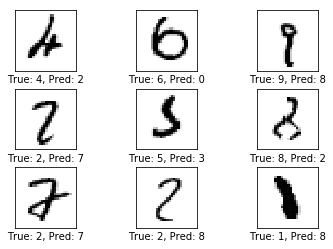

Matriz de confusión:
[[ 975    0    0    0    0    0    2    1    2    0]
 [   0 1114    3    1    1    0    2    1   13    0]
 [   6    0 1011    2    1    0    0    3    9    0]
 [   2    0    0 1002    0    2    0    1    3    0]
 [   1    0    1    0  971    0    1    0    2    6]
 [   2    0    1    9    0  871    3    1    3    2]
 [   6    1    0    1    2    3  941    0    4    0]
 [   1    1    6    1    0    0    0 1011    2    6]
 [   3    0    3    2    1    0    1    2  960    2]
 [   6    2    0    4    6    0    0    3    6  982]]


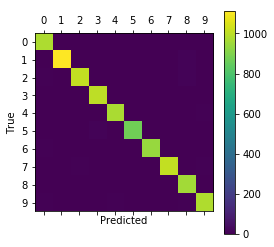

In [166]:
print_test_accuracy(show_example_errors=True,
                    show_confusion_matrix=True)

Finalmente, la RNC consigue un acierto del 98.4% en la muestra de test. Aún se observan algunos ejemplos que no ha conseguido clasificar por completo. Hay que reconocer que entre los ejemplos de errores, existen algunos que parecen básicos para una red neuronal que obtiene un porcentaje de *accuracy* tan alto. En la matriz de confusión se puede observar como los principales errores los comete en los números 0 y 8 -aunque también el 9 y el 3-. Por tanto, se puede concluir que no ha terminado de comprender las formas y trazos circulares. Además, en estos números, hay que destacar que se realizan combinaciones distintas de trazos circulares -unos abiertos, otros cerrados, algunos dobles-, por lo tanto, es el elemento más complejo de aprender para la red neuronal. 

## Visualización de los filtros o kernels

Tratando de comprender cómo reconoce la RNC los números, se podrían visualizar los filtros y las imágenes que resultan del mapa de características.


### Función para representar los filtros o kernels

In [103]:
def plot_conv_weights(weights, input_channel=0):
    # Se asume que los pesos son operaciones TensorFlow para variables
    # de 4 dimensiones; por ejemplo weights_conv1 or weights_conv2.
    
    # Se recuperan los valores de las variables de peso de TensorFlow.
    w = session.run(weights)

    # Sacamos el valor máximo y mínimo de los pesos.
    # Esto se utiliza para corregir la intensidad del color 
    # de las imágenes para que puedan ser comparadas.
    w_min = np.min(w)
    w_max = np.max(w)

    # Número de filtros en la capa convolucional.
    num_filters = w.shape[3]

    # Número de grids para dibujar.
    # Es alrededor de la raíz cuadrada del número de filtros.
    num_grids = math.ceil(math.sqrt(num_filters))
    
    # Creamos una figura con el conjunto de sub-plots.
    fig, axes = plt.subplots(num_grids, num_grids)

    # Graficamos los pesos de todos los filtros.
    for i, ax in enumerate(axes.flat):
        # Sólo los válidos:
        if i<num_filters:
            
            img = w[:, :, input_channel, i]

            # Sacamos la imagen.
            ax.imshow(img, vmin=w_min, vmax=w_max,
                      interpolation='nearest', cmap='seismic')
        
        # Quitamos los ticks del gráfico.
        ax.set_xticks([])
        ax.set_yticks([])
    
    
    plt.show()

### Función para representar los output de las capas ocultas

In [104]:
def plot_conv_layer(layer, image):
    # Se asume que los pesos son operaciones TensorFlow para variables
    # de 4 dimensiones; por ejemplo weights_conv1 or weights_conv2.
    # Esto es la salida de la capa convolucional 1.


    # Creamos un diccionario con sólo imágenes.
    # Vemos que no le damos nada al valor y ya que 
    # no lo necesitamos en este cálculo.
    feed_dict = {x: [image]}

    # Se calculan y recuperan los valores de salida de la capa
    # cuando metemos esa imagen.
    values = session.run(layer, feed_dict=feed_dict)

    # Número de filtros utilizados en esta capa de conv.
    num_filters = values.shape[3]

    # Número de cuadrículas que representar.
    # Es alrededor de la raíz cuadrada del número de filtros.
    num_grids = math.ceil(math.sqrt(num_filters))
    
    # Creamos una figura con el conjunto de sub-plots.
    fig, axes = plt.subplots(num_grids, num_grids)

    # Graficamos las imágenes del output de cada filtro.
    for i, ax in enumerate(axes.flat):
        # Sólo las imágenes de los filtros válidos:
        if i<num_filters:
            
            img = values[0, :, :, i]

            # Sacamos la imagen.
            ax.imshow(img, interpolation='nearest', cmap='binary')
        
        # Quitamos los ticks de los gráficos.
        ax.set_xticks([])
        ax.set_yticks([])
    
    
    plt.show()

### Imagenes de entrada

Función para representar las imágenes.

In [78]:
def plot_image(image):
    plt.imshow(image.reshape(img_shape),
               interpolation='nearest',
               cmap='binary')

    plt.show()

A continuación se muestran un par de imágenes que próximamente se enseñará su mutación tras pasar por las capas ocultas. De esta forma, es posible aproximarse a la forma de pensar de la RNC.

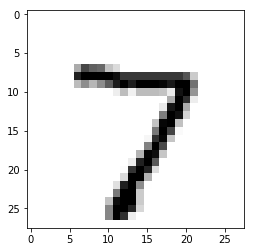

In [167]:
image1 = data.test.images[0]
plot_image(image1) # Un 7

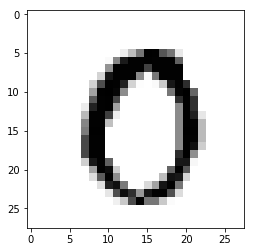

In [168]:
image2 = data.test.images[13]
plot_image(image2) # Un 0

### Proceso de identificación en la primera capa oculta convolucional

A continuación se representan los filtros de la primera capa oculta.

Los pesos positivos son rojos y los negativos son azules.

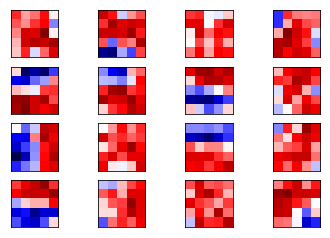

In [169]:
plot_conv_weights(weights = weights_conv1)

Aplicar estos filtros sobre la imagen original devuelve las siguientes imágenes -que serán el input de la segunda capa- tras pasar por la primera capa oculta. Véase que las imágenes se han reducido a 14x14 mediante el proceso de Pooling, es decir, la mitad de la resolución de la imagen original.

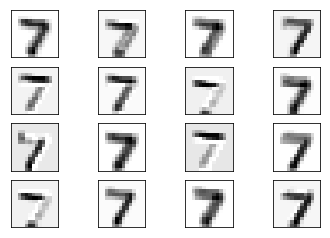

In [170]:
plot_conv_layer(layer=layer_conv1, image=image1)

Y estos son los resultados de aplicar los filtros a la segunda imagen de ejemplo.

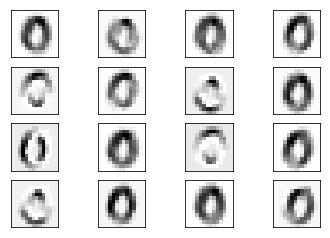

In [171]:
plot_conv_layer(layer=layer_conv1, image=image2)

Es dificil de comprender qué pretende hacer la red neuronal en esta primera capa, parece que ha creado diferentes versiones de la misma imagen. El cero se ve más deformado porque los filtros actuan sobre características concretas de la imagen. En este caso parece que se está centrando en identificar por un lado los bordes del cero (cuando la traza es blanca) y por otro lado trata de detectar la forma circular en sí (cuando la traza es negra). Parece como si el número hubiera sido iluminado y se están detectando las sombras proyectadas.

### Proceso de identificación en la segunda capa oculta convolucional

A continuación se harán los gráficos de los filtros e imágenes de la segunda capa convolucional. Recuérdese que existían 16 grupos de neuronas que incluían 36 filtros cada grupo. Dado que estos no aportan mucho valor al análisis actual solo se representarán un par de ellos.

Filtros del primer *channel* o grupo:

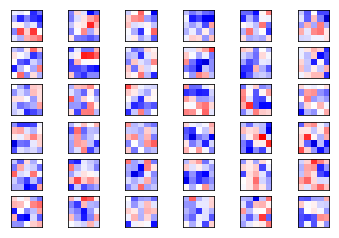

In [172]:
plot_conv_weights(weights=weights_conv2, input_channel=0)

Filtros del segundo *channel* o grupo:

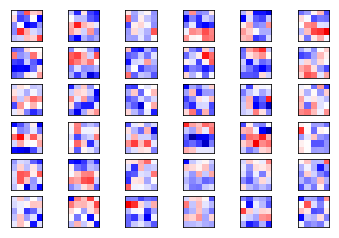

In [173]:
plot_conv_weights(weights=weights_conv2, input_channel=1)

Intentar entender estos filtros es una tarea sin demasiado sentido, la complejidad es muy alta y son bastante abstractos. Tan solo se puede decir que cada uno estudia un aspecto que la red neuronal ha considerado representativo de las imágenes.

Tras aplicar estos filtros a las imágenes de entrada (que eran salida de la primera capa convolucional), se obtienen los siguientes resultados. En esta ocasión, tras el proceso de Pooling se han reducido a 7x7.

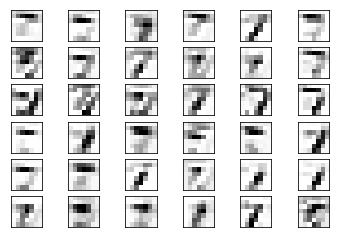

In [174]:
plot_conv_layer(layer=layer_conv2, image=image1)

Y para el número cero:

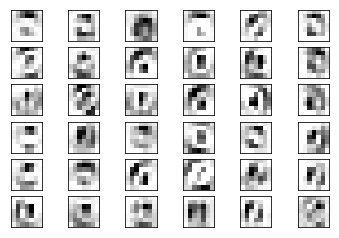

In [175]:
plot_conv_layer(layer=layer_conv2, image=image2)

Si se analizan con detenimiento -y con algo de imaginación si se permite decirlo-, la red neuronal parece estar detectando patrones lineales -en el caso del número siete-. Los píxeles más oscuros parecen tomar formas más rectas que identifican las trazas del número. Esto parece lógico en cuanto a manuscripción se refiere; para escribir un siete se dibujaría una línea vertical y otra horizontal, el número sigue patrones lineales, y parece que la red neuronal ha conseguido descubrirlos. En cualquier lugar, es muy dificil de interpretar el reconocimiento de características por parte de la red neuronal. El mejor análisis post-test es el porcentaje de *accuracy*, la matriz de confusión (aunque dado su elevado acierto se simplifica el análisis) y, lo más importante, valorar si los errores cometidos son lógicos, es decir, si un humano también habría dudado en su clasificación.

## Conclusiones

El aprendizaje automático ha sido materia de investigación durante décadas. Hoy en día, gracias al gran volumen de datos con la llegada del Big Data  y a una capacidad de computación grande se está empezando a utilizar cada vez más. 

TensorFlow es una librería de aprendizaje automático que permite construir, entrenar y ejecutar redes neuronales de manera muy ágil. El algoritmo se representa como un grafo de flujo de datos, permitiendo sacar provecho tanto de CPUs como de GPUs en múltiples entornos. TensorFlow también tiene un visualizador TensorBoard que permite obtener información sobre cómo está funcionando el algoritmo. Poder medir y visualizar resulta muy importante para la creación de mejores modelos.

En este trabajo se presenta una forma de procesamiento de los dígitos manuscritos basados en el entrenamiento de una Red Neuronal Convolucional  para su reconocimiento. Estas redes son una de las arquitecturas de aprendizaje profundo más populares, y están diseñadas específicamente para resolver problemas de visión artificial como el reconocimiento de patrones y la clasificación de imágenes. El objetivo ha sido aprender el funcionamiento de una red neuronal y de la librería TensorFlow.

Se ha empleado un conjunto de datos formado por 70.000 imágenes en blanco y negro de dígitos hechos a mano. Consta de 50.000 imágenes para entrenar al modelo y 10.000 imágenes para testear el modelo. Nos permite no tener que dedicar mucho tiempo al preproceso y formateado de las imágenes, ambos pasos muy importantes y generalmente costosos en tiempo.

En base a los resultados obtenidos se muestra que nuestro enfoque es acertado. El sistema logra un porcentaje de reconocimiento del 99%  de  accuracy sobre el conjunto de test. Por tanto, se puede concluir que el resultado ha sido satisfactorio.

### Bibliografía

Instalar TensorFlow en Docker: https://hub.docker.com/u/tensorflow/

https://www.tensorflow.org/

https://www.tensorflow.org/versions/r0.12/tutorials/mnist/beginners/

https://www.tensorflow.org/tutorials/deep_cnn

https://es.scribd.com/document/357782245/Redes-Neuronales-Convolucionales

http://timdettmers.com/2015/03/26/convolution-deep-learning/

https://allenlu2007.wordpress.com/2017/06/21/mnist-nn-visualization/

https://www.youtube.com/watch?v=HMcx-zY8JSg

https://www.youtube.com/watch?v=mynJtLhhcXk

https://www.youtube.com/watch?v=umGJ30-15_A

https://medium.com/@awjuliani/visualizing-neural-network-layer-activation-tensorflow-tutorial-d45f8bf7bbc4

https://gist.github.com/awjuliani/acde9d491658265c3fbf6a74b91518e3#file-deep-layer-visualization-ipynb

https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/tensorflow.html

https://codelabs.developers.google.com/codelabs/cloud-tensorflow-mnist/#4

https://github.com/hwalsuklee/tensorflow-mnist-cnn

https://danerineuronal.wordpress.com/2017/09/10/ml-04-red-neuronal-basica/

http://sisbib.unmsm.edu.pe/Bibvirtual/publicaciones/risi/2009_n2/v6n2/a03v6n2.pdf